In [2]:
from plot import plot
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import arima
import pandas as pd
import numpy as np

In [3]:
series = pd.read_csv('./more_malwares/lago/data_two_years/malwares_Out_2019_to_Out_2021_training.csv')
series.columns = ['qtde', 'month']
series.head()

,qtde,month
0,24,0
1,22,1
2,18,2
3,30,3
4,18,4


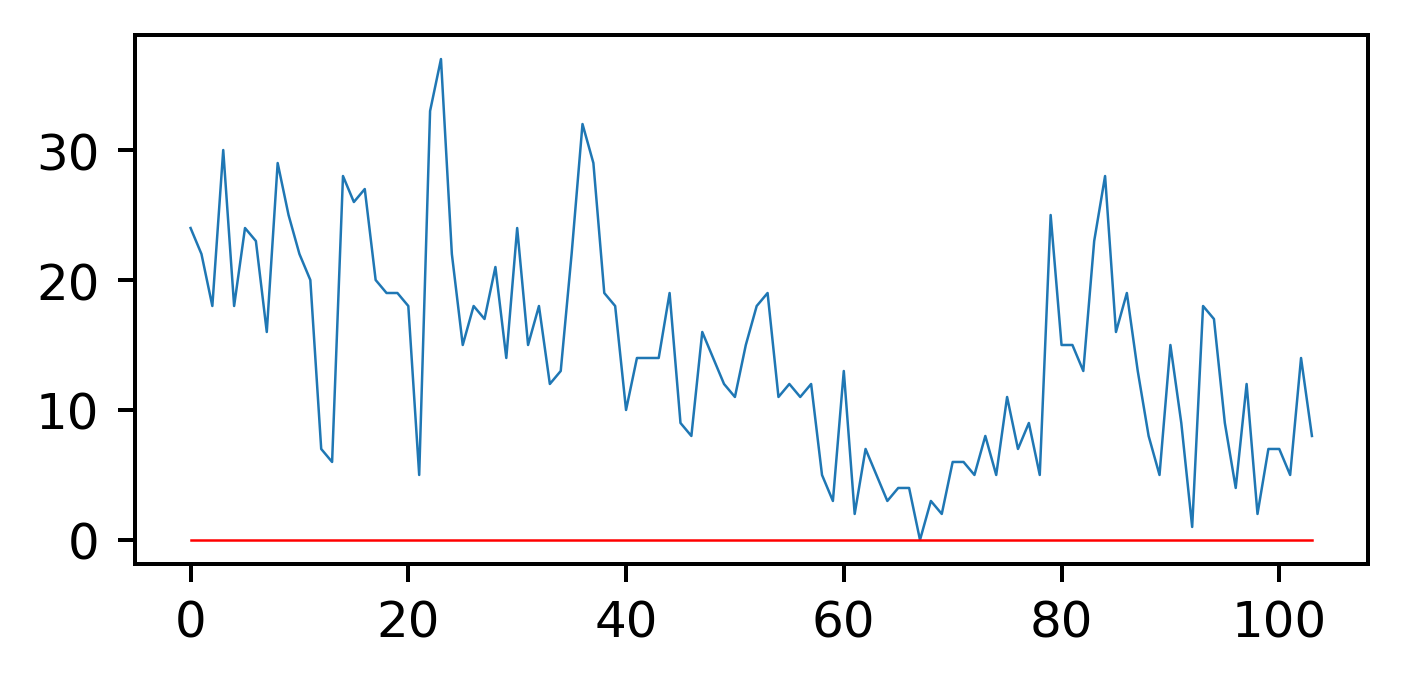

In [4]:
plot(series['qtde'], sec_plots=[[0 for i in range(len(series))]])

In [5]:
def divide_xy(series, lag=4):
  x = []
  y = []
  for i in series[:lag]:
    x.append(series[i:i+lag])
    y.append(series[i+4])
  return x, y

In [13]:
x, y = divide_xy(series['qtde'], lag=4)
models = arima.auto_arima(series['qtde'], return_valid_fits=True)
models
# arima_model = ARIMA(x, order=(1,0,0)).fit()

(ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(2, 1, 2), scoring_ar

In [19]:
models[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -336.509
Date:                Wed, 25 Oct 2023   AIC                            679.018
Time:                        17:58:07   BIC                            686.922
Sample:                             0   HQIC                           682.219
                                - 104                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5704      0.080     -7.129      0.000      -0.727      -0.414
ma.L2         -0.2088      0.089     -2.343      0.019      -0.383      -0.034
sigma2        39.9763      4.962      8.056      0.000      30.250      49.702
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                11.91
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.69
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

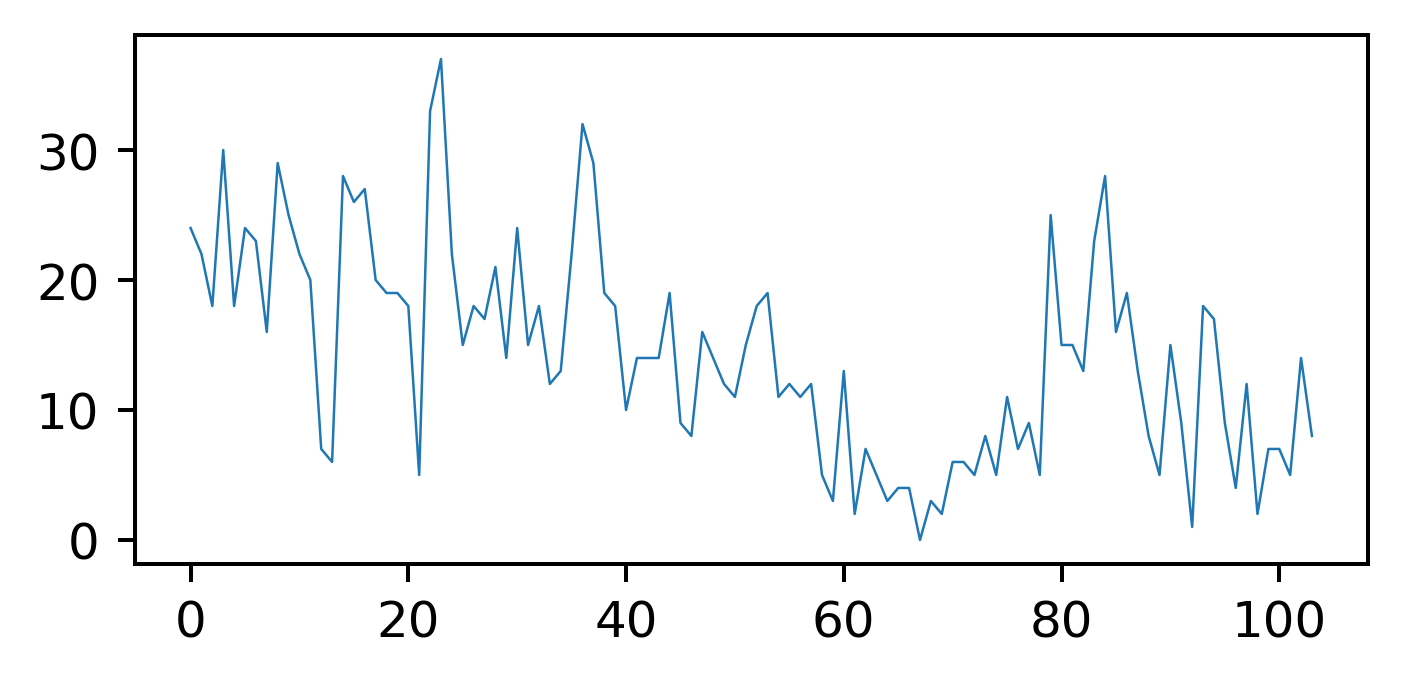

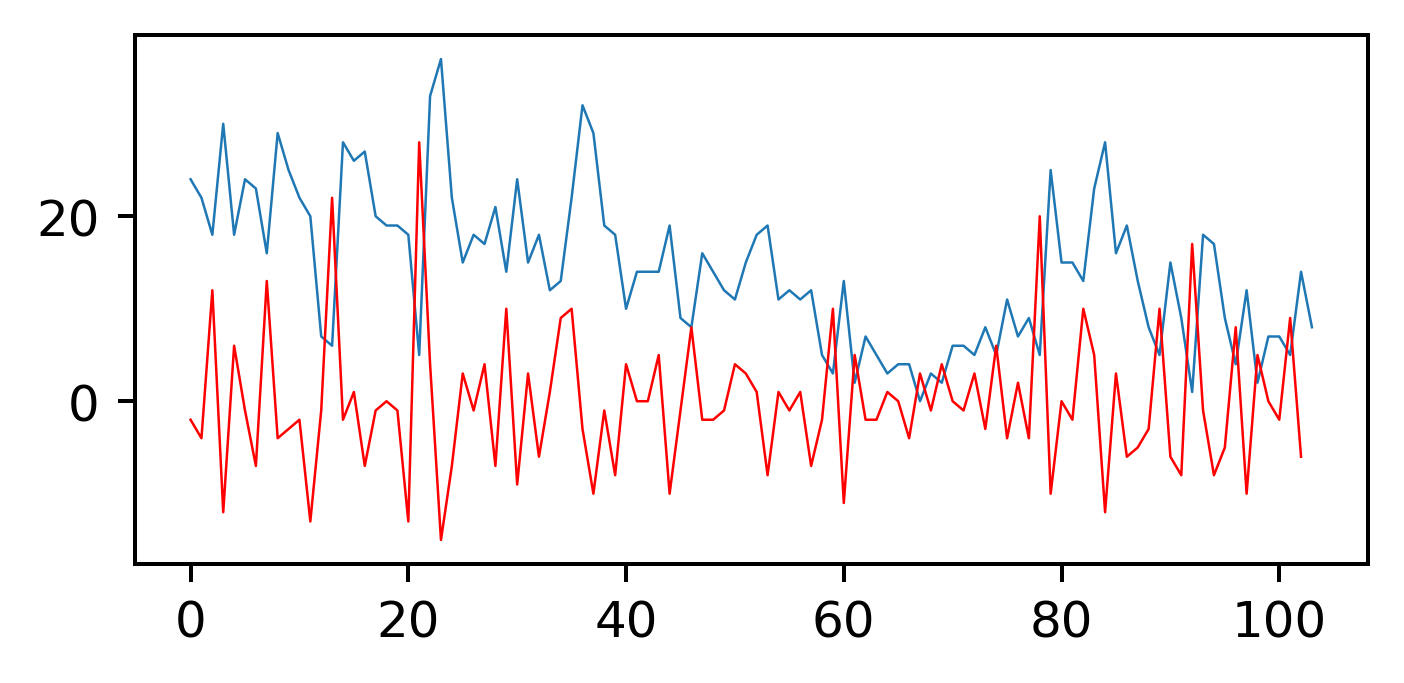

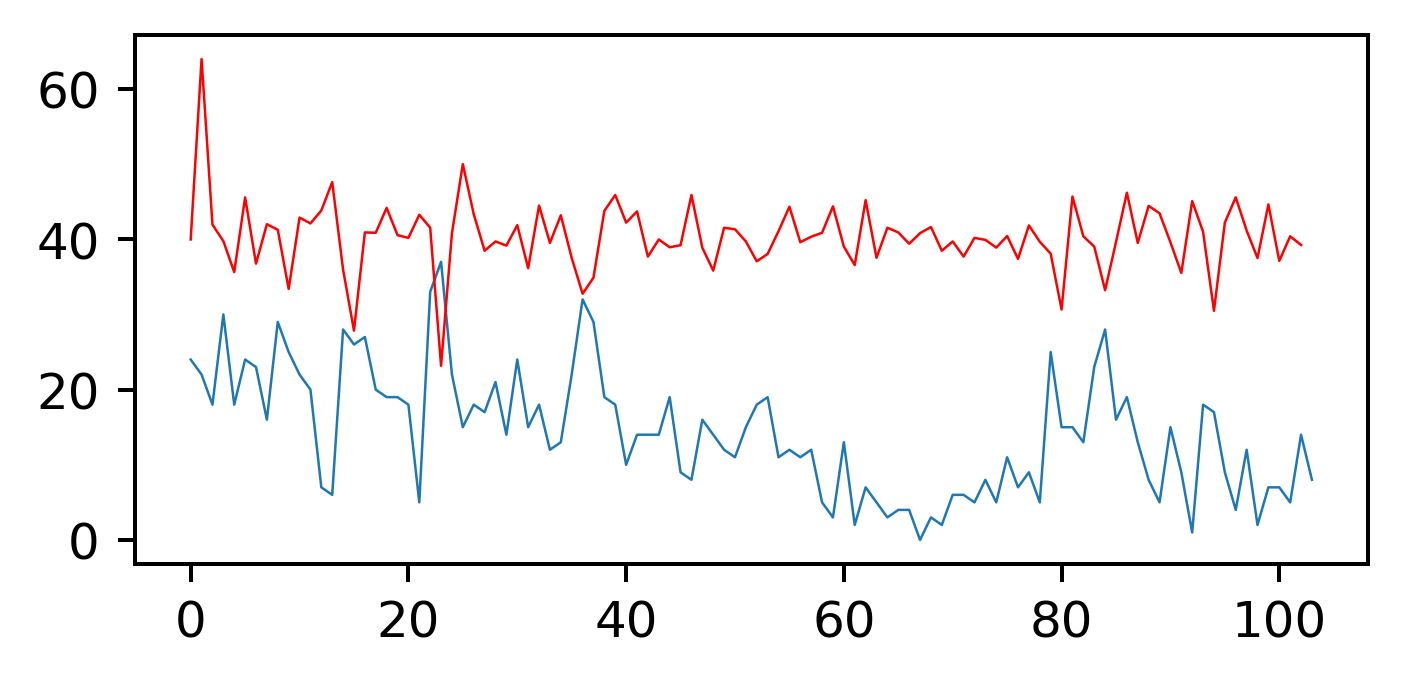

In [23]:
plot(series['qtde'])
diff_series = np.diff(series['qtde'])
plot(series['qtde'], sec_plots=[diff_series])
ma_series = [sum([x*w for x, w in zip(lags, [-0.5704, -0.2088])]) for lags in [diff_series[i:i+3] for i in range(len(diff_series) - 2)]]
predict = np.concatenate(([0, series['qtde'][0]], ma_series)) + 39.9763
plot(series['qtde'], sec_plots=[predict])

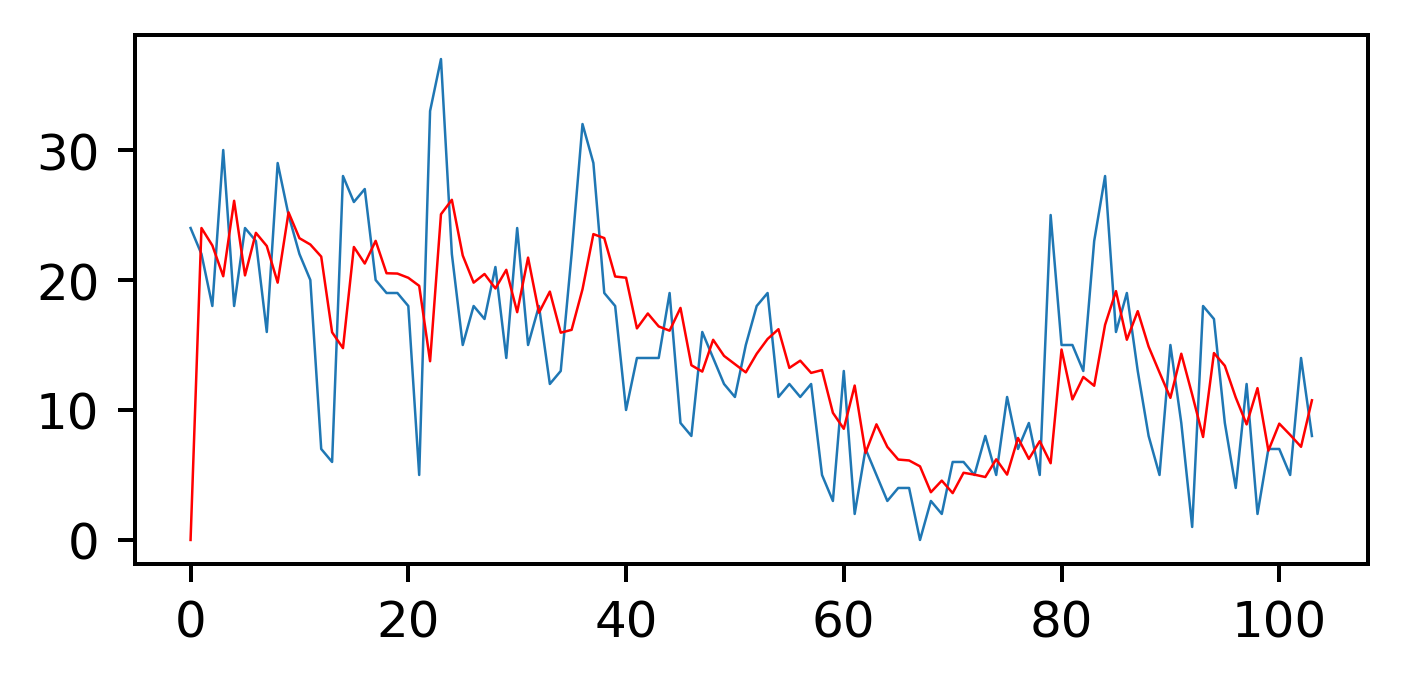

In [14]:
plot(series['qtde'], sec_plots=[models[0].predict_in_sample()])